# What sells a car?

This is dataset from Crankshaft List. Hundreds of free advertisements for vehicles are published on site every day. We will study data collected over the last few years and determine which factors influence the price of a vehicle.

# Goal:
Test five hypotheses:

- 1.Is there a correlation between price and age of vehicle?
- 2.Is there a correlation between price and meleage?
- 3.Is there a correlation between price and condition?
- 4.Is there a correlation between price and transmiission type?
- 5.Is there a correlation between price and color?


## Initialization

Load libraries that are required for the project.

In [2]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

Load the project data and have a look at the general information.

In [3]:
# Load the data file into a DataFrame
cars_df = pd.read_csv("/datasets/vehicles_us.csv")


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [4]:
# print the general/summary information about the DataFrame
cars_df.info()
cars_df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(51525, 13)

- Dataset has 51525 rows and data types int64, float64, and object.
- The columns:
              'model_year',
              'cylinders',
              'odometer',
              'paint_color',
              'is_4wd' ,
              have differant number of row . 
- This means the data contains missing values.

In [5]:
# print a sample of data
cars_df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17



- Missing values in the columns are represented as NaN values.
- Columns are represented by categorial data.
- Column 'date_posted' represeted as sring ,object type

Are there columns with inappropriate data types?

In [6]:
cars_df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [7]:
#Lets check column'date_posted'
type(cars_df.date_posted[0])

str

 What columns contain the most missing values?


In [8]:
cars_df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
# Percentage of missing values
missing_values=cars_df.isnull().sum()
missing_values[missing_values>0]/len(cars_df)*100

model_year      7.023775
cylinders      10.208637
odometer       15.316836
paint_color    17.985444
is_4wd         50.369723
dtype: float64

- **Column 'is_4wd' contain the most missing values is 50%**

### Conclusions and further steps



- 1.Dataset has of missing values. Percentage of the most missing value in column 'is_4wd' is 50%
- Missing value related to other value.
- This is confusing and would be better stated as missing conditionally at random. Here, missing data do have a relationship with other variables in the dataset. However, the actual values that are missing are random.

- 2.Type of missing data is MAP

- 3.Missing values for variables 'odometer' and 'cylinders' are filled in with representative values (mean or median if any outliers)

- 4.Data in column 'paint_color' are qualitative variables so replaced as categorical data

- 5.Data in column 'is_4wd' flled in by 0 as True:1 and False:0 

- if a Boolean field contains only True values, it's reasonable to assume that the missing values are False.

- 6.Data in column 'date_posted' represeted as str so it will be converted by Timestamp

## Treat missing values (if any)

Study missing values for each column in more details and decide what to do with them based on meaningful hypotheses

#### Column 'Model_Year'

In [10]:
#Check 'model_year' for suspicious values  
display(sorted(cars_df['model_year'].unique()))

[2011.0,
 nan,
 1908.0,
 1929.0,
 1936.0,
 1948.0,
 1949.0,
 1954.0,
 1955.0,
 1958.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0]

In [11]:
# Look at for distribution of values
cars_df['model_year'].value_counts(dropna = False)

NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 69, dtype: int64

In [12]:
cars_df['model_year'].median()

2011.0

In [13]:
# Distribution of `model_year` medians  based on  identified parameters
cars_df.groupby(['model','odometer'])['model_year'].median()

model              odometer
acura tl           143.0       2004.0
                   160.0          NaN
                   165.0       2007.0
                   18600.0     2003.0
                   36000.0     2012.0
                                ...  
volkswagen passat  221000.0    2000.0
                   229000.0    2007.0
                   238000.0    2013.0
                   240000.0    2004.0
                   740000.0    2012.0
Name: model_year, Length: 27863, dtype: float64

In [14]:
# Replace missing values based on identified parameter
cars_df['model_year'] = cars_df['model_year'].fillna(cars_df.groupby(['model'])['model_year'].transform('median'))

In [15]:
# Lets check it 
cars_df['model_year'].isna().sum()

0

#### Cylinders

In [16]:
# look at distribution of values 
cars_df['cylinders'].value_counts(dropna=False)

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [17]:
# Look at for statistical distribution
cars_df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [18]:
#Let's see values based on identified factor 'model'  by group them
cars_df.groupby(['model'])['cylinders'].value_counts(dropna= False)

model              cylinders
acura tl           6.0          208
                   NaN           25
                   4.0            3
bmw x5             6.0          200
                   8.0           51
                               ... 
volkswagen jetta   6.0            4
volkswagen passat  4.0          243
                   5.0           43
                   NaN           34
                   6.0           30
Name: cylinders, Length: 407, dtype: int64

In [19]:
# look at mean value based on identified factor
cars_df.groupby(['model'])['cylinders'].mean()

model
acura tl             5.971564
bmw x5               6.406375
buick enclave        6.000000
cadillac escalade    7.986395
chevrolet camaro     6.887097
                       ...   
toyota sienna        5.952381
toyota tacoma        5.345205
toyota tundra        7.919561
volkswagen jetta     4.281116
volkswagen passat    4.325949
Name: cylinders, Length: 100, dtype: float64

In [20]:
# Write a function that we will use for filling in missing values
cars_df["cylinders"] = cars_df.groupby("model").transform(lambda x: x.fillna(x.mean()))

In [21]:
# Check it if it works
cars_df['cylinders'].isna().sum()

0

####  Column 'Odometer'

In [22]:
#Distribution of  Odometer(mileage)
cars_df['odometer'].value_counts(dropna=False)


NaN         7892
0.0          185
140000.0     183
120000.0     179
130000.0     178
            ... 
51595.0        1
111381.0       1
155940.0       1
43402.0        1
74063.0        1
Name: odometer, Length: 17763, dtype: int64

In [23]:
# Statistical distribution 
cars_df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [24]:
# Distribution of `odemeter` means based on your identified parameters 'model'
cars_df.groupby(['model'])['odometer'].mean()

model
acura tl             142760.442786
bmw x5               113210.140351
buick enclave        113459.513274
cadillac escalade    123616.592453
chevrolet camaro      71067.983784
                         ...      
toyota sienna        136911.099644
toyota tacoma        126521.257426
toyota tundra        123271.181641
volkswagen jetta     107869.950783
volkswagen passat     90764.366337
Name: odometer, Length: 100, dtype: float64

In [25]:
# Replacing missing values based on your identified parameter
cars_df["odometer"] = cars_df.groupby("model").transform(lambda x: x.fillna(x.mean()))

In [26]:
# Check if it work
cars_df['odometer'].isna().sum()

0

#### Column 'paint_color'

In [27]:
# Distribution of values 
cars_df['paint_color'].value_counts(dropna=False)

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [28]:
# Find the most popular color (Mode) 
cars_df['paint_color'].mode()

0    white
dtype: object

In [29]:
#Replace missing values by Mode('white') color
cars_df['paint_color']=cars_df['paint_color'].fillna(cars_df.groupby('model')['paint_color'].transform(lambda x:x.mode().iat[0]))

In [30]:
# let's check
cars_df['paint_color'].isna().sum()

0

####  Column 'is_4wd'

In [31]:
# let's check  "is_4wd" values
cars_df['is_4wd'].value_counts(dropna =False)


NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In [32]:
# Replace NaN as 0
cars_df['is_4wd'].fillna(0, inplace=True)

In [33]:
cars_df['is_4wd'].isna().sum()

0

In [34]:
# Check the entries in all columns - make sure we fixed all missing values
cars_df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Fix data types

 fix the data types if required.

In [35]:
# let's check data type colummn 'date_posted'
type(cars_df.date_posted[0])

str

In [36]:
cars_df['date_posted'].head()

0    2018-06-23
1    2018-10-19
2    2019-02-07
3    2019-03-22
4    2019-04-02
Name: date_posted, dtype: object

In [37]:
# Convert to Timestamp
cars_df['date_posted'] = pd.to_datetime(cars_df['date_posted'],format ='%Y-%m-%d' )


In [38]:
#Ckeck it if it works
type(cars_df.date_posted[0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
# let's check model_year
type(cars_df.model_year[0])

numpy.float64

In [40]:
cars_df.shape

(51525, 13)

## Enrich data

Add additional factors to the data to make the analysis easier.

In [41]:
# find the day of week the add was posted
cars_df['weekday_posted'] =cars_df['date_posted'].dt.weekday
cars_df['weekday_posted']


0        5
1        4
2        3
3        4
4        1
        ..
51520    2
51521    2
51522    3
51523    0
51524    1
Name: weekday_posted, Length: 51525, dtype: int64

In [42]:
# find month of year  the add was posted
cars_df['month_posted'] =cars_df['date_posted'].dt.month
cars_df['month_posted']

0         6
1        10
2         2
3         3
4         4
         ..
51520    10
51521    11
51522    11
51523     7
51524     6
Name: month_posted, Length: 51525, dtype: int64

In [43]:
# find year of the ad was placed
cars_df['year_posted'] = cars_df['date_posted'].dt.year
cars_df['year_posted']

0        2018
1        2018
2        2019
3        2019
4        2019
         ... 
51520    2018
51521    2018
51522    2018
51523    2018
51524    2018
Name: year_posted, Length: 51525, dtype: int64

In [44]:
# Add the vehicle's age when the ad was placed
cars_df['vehicle_age'] = (cars_df['year_posted']+1) - cars_df['model_year']
cars_df['vehicle_age']


0         8.0
1         8.0
2         7.0
3        17.0
4         3.0
         ... 
51520     6.0
51521    17.0
51522    10.0
51523     6.0
51524     5.0
Name: vehicle_age, Length: 51525, dtype: float64

In [45]:
# Address the problematic values if they exist
cars_df['vehicle_age'] = np.abs(cars_df['vehicle_age'])

In [46]:
# Check the result - make sure it's fixed
cars_df['vehicle_age'].value_counts()

8.0     4066
7.0     3948
6.0     3845
5.0     3532
9.0     3381
        ... 
66.0       1
83.0       1
60.0       1
70.0       1
90.0       1
Name: vehicle_age, Length: 72, dtype: int64

In [47]:
# Check if additional factors added to Dataframe
cars_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
0,9400,2011.0,bmw x5,good,9400.0,gas,9400.0,automatic,SUV,black,1.0,2018-06-23,19,5,6,2018,8.0
1,25500,2011.0,ford f-150,good,25500.0,gas,25500.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8.0
2,5500,2013.0,hyundai sonata,like new,5500.0,gas,5500.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7.0
3,1500,2003.0,ford f-150,fair,1500.0,gas,1500.0,automatic,pickup,white,0.0,2019-03-22,9,4,3,2019,17.0
4,14900,2017.0,chrysler 200,excellent,14900.0,gas,14900.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3.0


In [48]:
# Add the vehicle's average mileage per year
avg_mileage_year =cars_df['odometer'] / cars_df['vehicle_age']

print(avg_mileage_year)

0        1175.000000
1        3187.500000
2         785.714286
3          88.235294
4        4966.666667
            ...     
51520    1541.500000
51521     158.823529
51522     395.000000
51523    1242.500000
51524    1260.000000
Length: 51525, dtype: float64


In [49]:
# replace the 'condition' values with something that can be manipulated more easily

display(sorted(cars_df['condition'].unique()))


['excellent', 'fair', 'good', 'like new', 'new', 'salvage']

- In the condition column, replace string values with a numeric scale
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [50]:
# Let's write funcion that replace string values with numerical
def condition_num(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'exellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    else:
        return 0

In [51]:
# Test if the function works
print(condition_num('new'))
print(condition_num('exellent'))
print(condition_num('fair'))

5
3
1


In [52]:
# Creating new column based on function

cars_df['condition_num'] = cars_df['condition'].apply(condition_num)

In [53]:
# Check modified Dataframe
cars_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,condition_num
0,9400,2011.0,bmw x5,good,9400.0,gas,9400.0,automatic,SUV,black,1.0,2018-06-23,19,5,6,2018,8.0,2
1,25500,2011.0,ford f-150,good,25500.0,gas,25500.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8.0,2
2,5500,2013.0,hyundai sonata,like new,5500.0,gas,5500.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7.0,4
3,1500,2003.0,ford f-150,fair,1500.0,gas,1500.0,automatic,pickup,white,0.0,2019-03-22,9,4,3,2019,17.0,1
4,14900,2017.0,chrysler 200,excellent,14900.0,gas,14900.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3.0,0


In [54]:
# Checking duplicates
print(cars_df.duplicated().sum()) 

0


## Check clean data

Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.

In [55]:
# print the general/summary information about the DataFrame

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
price             51525 non-null int64
model_year        51525 non-null float64
model             51525 non-null object
condition         51525 non-null object
cylinders         51525 non-null float64
fuel              51525 non-null object
odometer          51525 non-null float64
transmission      51525 non-null object
type              51525 non-null object
paint_color       51525 non-null object
is_4wd            51525 non-null float64
date_posted       51525 non-null datetime64[ns]
days_listed       51525 non-null int64
weekday_posted    51525 non-null int64
month_posted      51525 non-null int64
year_posted       51525 non-null int64
vehicle_age       51525 non-null float64
condition_num     51525 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(6), object(6)
memory usage: 7.1+ MB


In [56]:
# print a sample of data

cars_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,condition_num
0,9400,2011.0,bmw x5,good,9400.0,gas,9400.0,automatic,SUV,black,1.0,2018-06-23,19,5,6,2018,8.0,2
1,25500,2011.0,ford f-150,good,25500.0,gas,25500.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8.0,2
2,5500,2013.0,hyundai sonata,like new,5500.0,gas,5500.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7.0,4
3,1500,2003.0,ford f-150,fair,1500.0,gas,1500.0,automatic,pickup,white,0.0,2019-03-22,9,4,3,2019,17.0,1
4,14900,2017.0,chrysler 200,excellent,14900.0,gas,14900.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3.0,0


## Study core parameters

To appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

 To avoid duplicating our code,coding instrument as define function  might be helpful

In [1]:
# Define a function called 'plot_hist' 
def plot_hist(df,ft):
    df.hist(column=[ft], bins =100,figsize=(10, 5),color=['#FFCF56' ])
    plt.grid(True)
    plt.ylabel('frequency')
    plt.show()
    

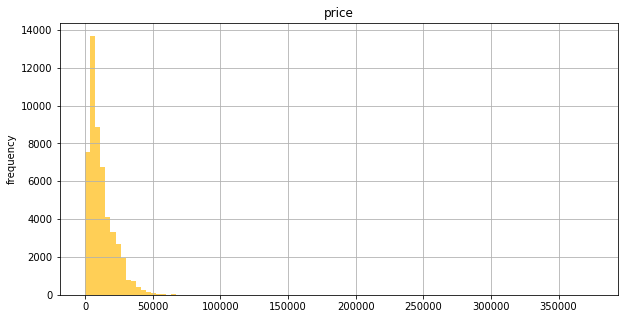

In [58]:
plot_hist(cars_df,'price')

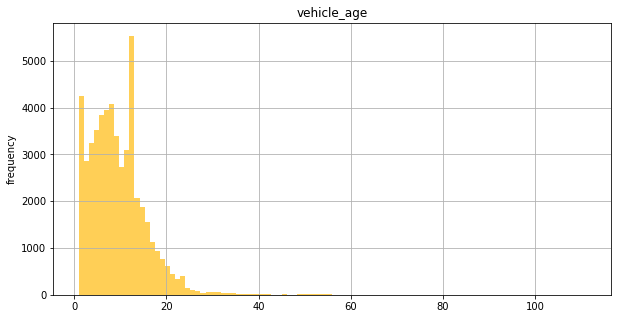

In [59]:
plot_hist(cars_df,'vehicle_age')

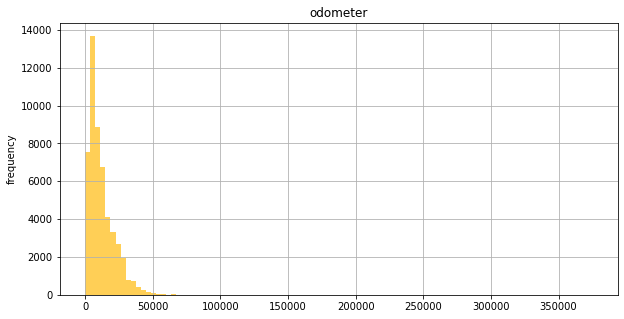

In [60]:
plot_hist(cars_df,'odometer')

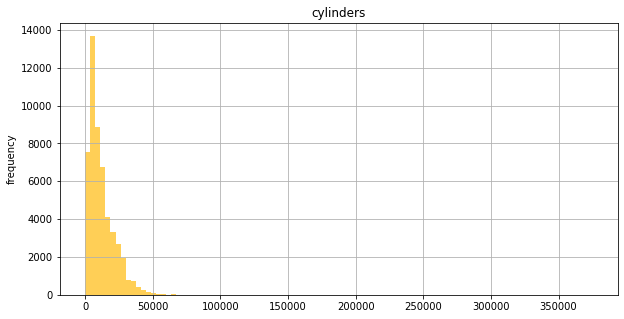

In [61]:
plot_hist(cars_df,'cylinders')

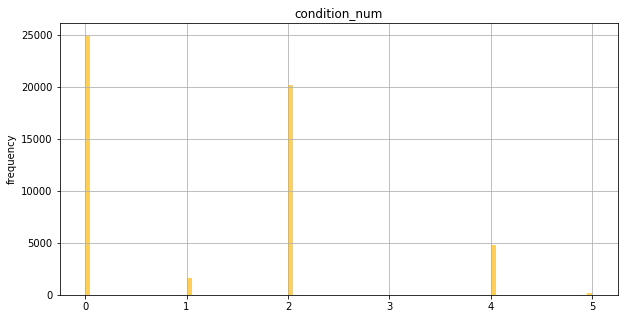

In [62]:
plot_hist(cars_df,'condition_num')

- There's a suspiciously high and sharp peak  for lower values 0  in columns  'price', 'odometer', 'vehicle_age' and 'cylinders'.

## Study and treat outliers

Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers.Outliers can be identified by defining the lower/upper limits for normal range of values.

In [63]:
# Determine the lower limits for outliers
Q1 = cars_df['price'].quantile(0.25)
Q3 = cars_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_whicker = Q1 - 1.5*IQR
lower_whicker

-12758.5

In [64]:
cars_df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [65]:
# Determine the upper limits for outliers

Q1 = cars_df['price'].quantile(0.25)
Q3 = cars_df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_whicker = Q3 + 1.5*IQR
upper_whicker

34597.5

In [66]:
# Define a function colled 'plot_boxplot' 
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

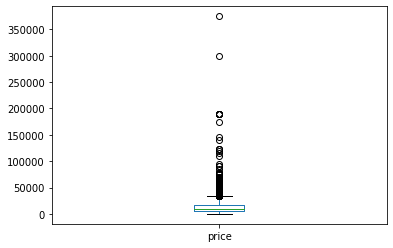

In [67]:
plot_boxplot(cars_df,'price')

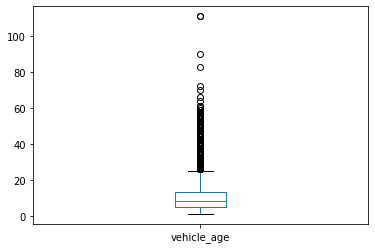

In [68]:

plot_boxplot(cars_df,'vehicle_age')

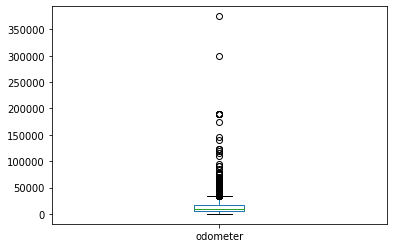

In [69]:
plot_boxplot(cars_df,'odometer')

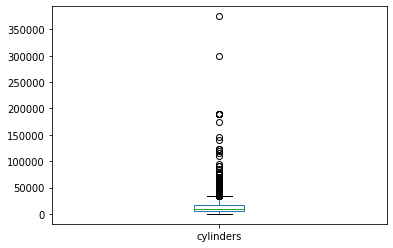

In [70]:
plot_boxplot(cars_df,'cylinders')

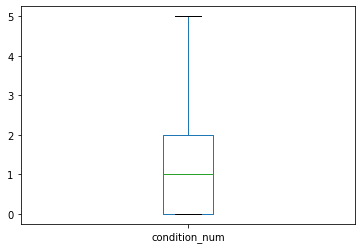

In [71]:
plot_boxplot(cars_df,'condition_num')

In [72]:
# To remove outliers define a function called 'outliers' which returns a list of index of ourliers
# IQR = Q3 - Q1
# +/- 1.5*IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound )]
    return ls

In [73]:
# Check if our function works
outliers(cars_df,'vehicle_age')

Int64Index([   63,   140,   255,   357,   358,   713,   853,   899,   959,
             1003,
            ...
            50612, 50665, 50939, 51008, 51014, 51063, 51152, 51176, 51325,
            51458],
           dtype='int64', length=737)

In [74]:
# Create an  empty list to store output indices from multiple columns
index_list =[]
for ft in ['price','vehicle_age','odometer','condition_num','cylinders']:
    index_list.extend(outliers(cars_df,ft))

In [75]:
#let's see outliers
index_list

[42,
 99,
 124,
 142,
 188,
 206,
 220,
 270,
 285,
 286,
 360,
 434,
 473,
 536,
 545,
 548,
 610,
 622,
 679,
 680,
 702,
 719,
 734,
 738,
 760,
 833,
 957,
 1007,
 1009,
 1064,
 1069,
 1119,
 1144,
 1164,
 1183,
 1259,
 1266,
 1270,
 1309,
 1326,
 1347,
 1355,
 1356,
 1382,
 1397,
 1404,
 1405,
 1442,
 1496,
 1523,
 1533,
 1549,
 1553,
 1587,
 1614,
 1620,
 1635,
 1641,
 1642,
 1647,
 1668,
 1688,
 1689,
 1702,
 1704,
 1711,
 1729,
 1735,
 1747,
 1748,
 1750,
 1820,
 1836,
 1838,
 1878,
 1891,
 1916,
 1923,
 2002,
 2011,
 2013,
 2017,
 2027,
 2037,
 2106,
 2114,
 2116,
 2193,
 2232,
 2253,
 2265,
 2291,
 2320,
 2333,
 2361,
 2364,
 2382,
 2407,
 2424,
 2462,
 2468,
 2473,
 2474,
 2477,
 2490,
 2492,
 2501,
 2509,
 2561,
 2565,
 2592,
 2595,
 2601,
 2608,
 2635,
 2645,
 2650,
 2663,
 2669,
 2677,
 2731,
 2790,
 2834,
 2862,
 2866,
 2867,
 2869,
 2945,
 2947,
 3016,
 3068,
 3086,
 3127,
 3166,
 3215,
 3239,
 3291,
 3318,
 3334,
 3416,
 3438,
 3462,
 3552,
 3569,
 3572,
 3624,
 3741,


In [76]:
#Define a fuction called remove which return cleaned dateframe without ouliers
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df    

In [77]:
# Check function if it works
cars_df_cleaned = remove(cars_df,index_list)


In [78]:
# Check shape new df
cars_df_cleaned.shape

(49175, 18)

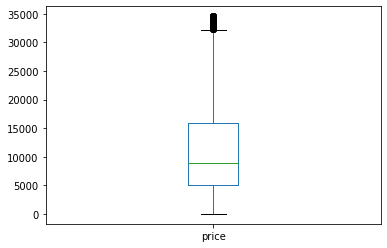

In [79]:
# lets chek boxplot if any outliers
plot_boxplot(cars_df_cleaned,'price')

- The boxplot was build for each variable to see and detect outliers with more details.

## Study core parameters without outliers

Use the filtered data to make new plots. Compare with the earlier ones (that included outliers)

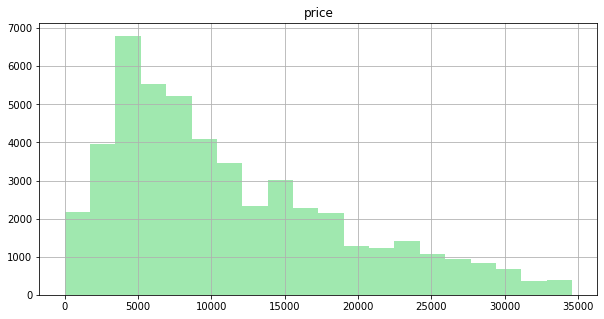

In [110]:
cars_df_cleaned.hist(column='price',
             bins =20,
             figsize=(10, 5),
             color=['#A0E8AF' ])
plt.show()

- The distribution of the prices of the cars are asymetrical and unimodel
- The data in the graph are right-skewed
- The new price histogram peaks at 5000


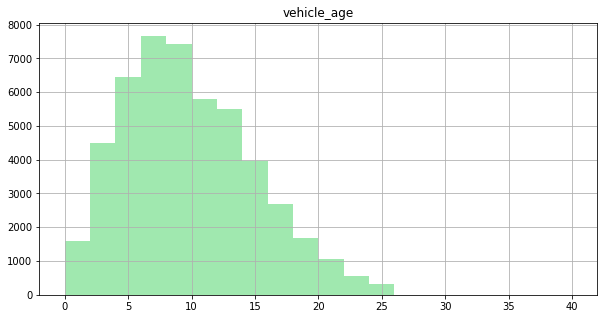

In [81]:
cars_df_cleaned['vehicle_age'].hist(bins =20,range=(0, 40),figsize =[10,5],color=['#A0E8AF' ])
plt.title('vehicle_age')
plt.show()


- The new age histogram peaks at 18, after which there is a steady decrease even though there is a second peak at 20 

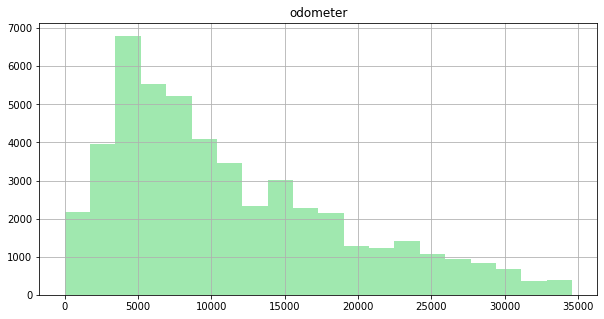

In [82]:
cars_df_cleaned['odometer'].hist(bins =20,figsize =[10,5],color=['#A0E8AF' ])
plt.title('odometer')
plt.show()

- In the new odometer histogram, the peak is around 5000 

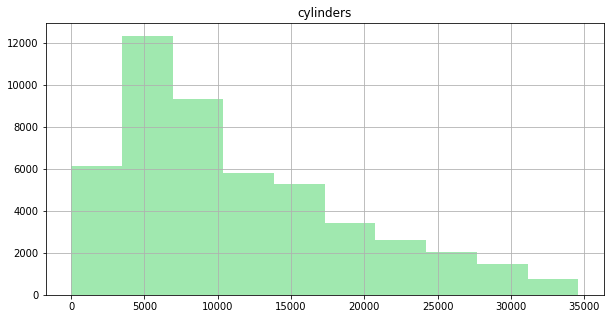

In [83]:
cars_df_cleaned['cylinders'].hist(bins =10,figsize =[10,5],color=['#A0E8AF' ])
plt.title('cylinders')
plt.show()

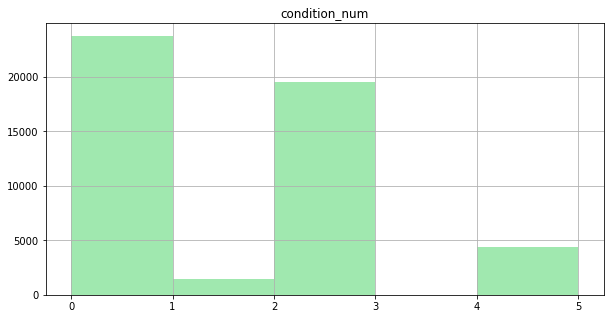

In [84]:
cars_df_cleaned['condition_num'].hist(bins =5,figsize =[10,5],color=['#A0E8AF' ])
plt.title('condition_num')
plt.show()

#### Conclusion
1. The distribution of the prices of the cars are asymetrical and unimodel.The data in the graph are right-skewed.The new price histogram peaks at 5000
2. The new vehicle_age histogram peaks at 5, after which there is a steady decrease even though there is a second peak at 18.
3. In the new odometer histogram, the peak is around 5000
4.  The main difference between the price, vechicle_age and odometer from filtered_data and those from the original data set is that the newer histograms have more noise since they are dealing with more limited set of values. Also, the tails are gone. But they have the same peaks.


## Ads lifetime

 - We goingn to study how many days advertisements were displayed (`days_listed`).
 - Calculate the mean and median.
 - Describe the typical lifetime of an ad.
 - Determine when ads were removed quickly, and when they were listed for an abnormally long time.

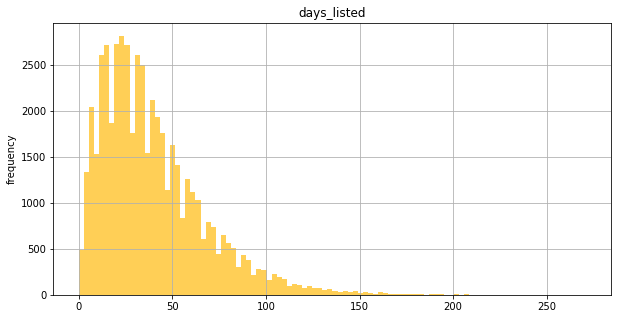

In [85]:
# How many days advertisements was displyed
plot_hist(cars_df,'days_listed')

- The histogramm  shows the data distributed  from 0 days to 230 days. We have abnormal peak skewed to the left. That means we have high  amount of Ads wich  listed less than 1 day from another side we have  Ads wich listed long period of time more than 250 days. We should investigate this is abnormalities 

In [86]:
#Calculate mean
cars_df['days_listed'].mean()

39.55475982532751

In [87]:
# Calculate median
cars_df['days_listed'].median()

33.0

In [88]:
#Determine when ads were removed quickly
too_short = cars_df.query('days_listed == 0')

In [89]:
too_short.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,condition_num
1247,14995,2008.0,chevrolet silverado 1500,excellent,14995.0,gas,14995.0,automatic,truck,grey,1.0,2018-05-15,0,1,5,2018,11.0,0
1711,59589,2019.0,chevrolet silverado 2500hd,excellent,59589.0,diesel,59589.0,automatic,truck,white,1.0,2019-01-13,0,6,1,2019,1.0,0
1983,14000,1999.0,ford f250,excellent,14000.0,diesel,14000.0,automatic,truck,red,1.0,2018-09-27,0,3,9,2018,20.0,0
2883,4000,2004.0,ram 1500,excellent,4000.0,gas,4000.0,automatic,truck,brown,1.0,2018-08-13,0,0,8,2018,15.0,0
3965,16750,1985.0,chevrolet corvette,like new,16750.0,gas,16750.0,automatic,hatchback,white,0.0,2018-10-14,0,6,10,2018,34.0,4


In [90]:
# The summary of the shortest time  of an Ads by weekday
(cars_df
     .query('days_listed == 0')
     .pivot_table(index='weekday_posted', values='days_listed', aggfunc='count'))
     

,days_listed
weekday_posted,
0,12
1,12
2,3
3,5
4,7
5,5
6,10


In [91]:
# when Ads were listed for an abnormally long time
too_long = cars_df.query('days_listed >= 150')

In [92]:
#the summary of the longest time  of  Ads by weekday
(cars_df
     .query('days_listed >= 150')
     .pivot_table(index='weekday_posted', values='days_listed', aggfunc='count'))
   

,days_listed
weekday_posted,
0,39
1,42
2,35
3,36
4,31
5,35
6,33


In [93]:
#the summary of the longest time  of an Ads by years and month
(cars_df
     .query('days_listed == 0')
     .pivot_table(index=['year_posted', 'month_posted'], values='days_listed', aggfunc='count'))
   

days_listed
year_posted month_posted             
2018        5                       5
            6                       2
            7                       8
            8                       8
            9                       9
            10                      6
            11                      1
            12                      2
2019        1                       3
            2                       2
            3                       6
            4                       2

##### Conclusion
- Typical lifetime of an Ads between 33-39 days.
- Abnormally short time of an Ads discovered in months July, August, September 2018 year.

## Average price per each type of vehicle

Analyzing the number of ads and the average price for each type of vehicle.

Plotting a graph showing the dependence of the number of ads on the vehicle type.

Selecting the two types with the greatest number of ads.

In [94]:
# Created table with Avarage price of car's type
# Avarage price per each type of vehicle
avg_price_type=cars_df_cleaned.pivot_table(index='type',values='price',aggfunc='median')

display(avg_price_type)

,price
type,
SUV,8600
bus,10500
convertible,12626
coupe,12500
hatchback,5950
mini-van,6495
offroad,12500
other,8995
pickup,13900


In [95]:
# Calculate the number of ads by car type.
num_ads_type = cars_df_cleaned['type'].value_counts()
display(num_ads_type)

sedan          12108
SUV            12026
truck          11406
pickup          6494
coupe           2047
wagon           1529
mini-van        1157
hatchback       1019
van              587
convertible      354
other            240
offroad          185
bus               23
Name: type, dtype: int64

In [96]:
# Summury avarage price and number of Ads by vehicle type
type_stat=avg_price_type.join(num_ads_type)
#joins the 2 tables we created to form a table called type_stat
type_stat.columns = ['price', 'ads']
#renames the columns to 'price' and 'ads'
type_stat = type_stat.sort_values('ads', ascending=False)
#this sorts the values in our new table in descending order of number of ads
type_stat

,price,ads
type,,
sedan,5995,12108
SUV,8600,12026
truck,14499,11406
pickup,13900,6494
coupe,12500,2047
wagon,7896,1529
mini-van,6495,1157
hatchback,5950,1019
van,7650,587


-  The greatest number of Ads have 2 type SUVs and sedans

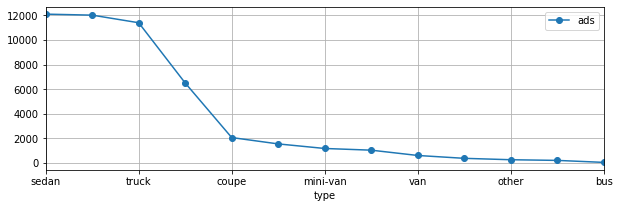

In [97]:
#graph showing the dependence of the number of ads on the vehicle type

type_stat.plot(y='ads',style='o-', grid=True, figsize=(10,3))

## Price factors

What factors impact the price most? 
- We are going to take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. 
- For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest.
- When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

Make use of correlation matrix and correlation plots

###  Type of vehicle - SUV

#### Is there corallation between  price and odometer(mileage) ,vehicle_age, conditon?

In [98]:
# Create table where  type of vehicle is SUV
suv_df =cars_df_cleaned.query('type == "SUV"')
suv_df = suv_df[['price', 'vehicle_age', 'odometer', 'condition_num', 'transmission', 'paint_color']]
suv_df = suv_df.reset_index(drop=True)
suv_df.head()

,price,vehicle_age,odometer,condition_num,transmission,paint_color
0,9400,8.0,9400.0,2,automatic,black
1,15990,7.0,15990.0,0,automatic,black
2,11500,7.0,11500.0,0,automatic,silver
3,9200,12.0,9200.0,0,automatic,blue
4,12990,11.0,12990.0,0,automatic,black


                  price  vehicle_age  odometer  condition_num
price          1.000000    -0.576500  1.000000      -0.002016
vehicle_age   -0.576500     1.000000 -0.576500       0.040255
odometer       1.000000    -0.576500  1.000000      -0.002016
condition_num -0.002016     0.040255 -0.002016       1.000000


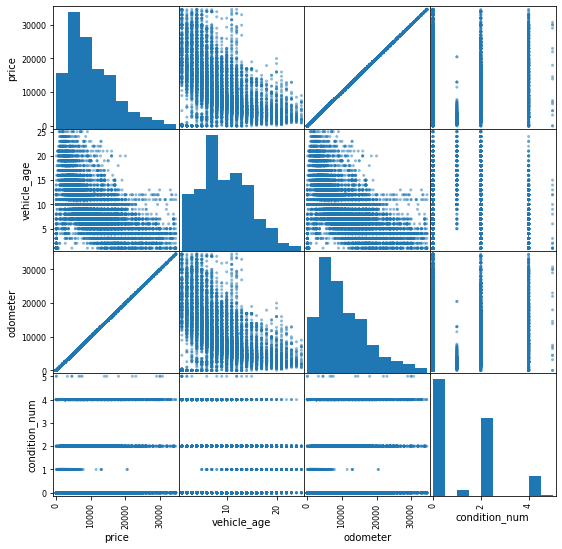

In [99]:
# Plotting corralation matrix for SUV type 
pd.plotting.scatter_matrix(suv_df, figsize=(9, 9)) 

print(suv_df.corr())

#### Is there corallation between transmission, color  and price?

In [100]:
# Check if any coralation between color of vehicle and price
suv_df.groupby(['paint_color'])[['price']].median().reset_index().sort_values(by='price',ascending=False)

,paint_color,price
6,orange,16900
11,yellow,13488
0,black,10900
10,white,9141
5,grey,7999
3,custom,7995
9,silver,7995
8,red,7600
2,brown,7200
1,blue,6950


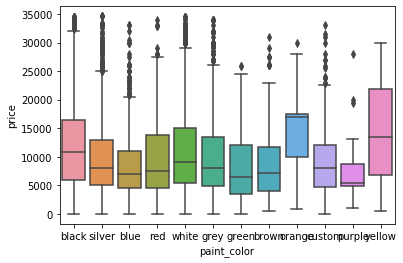

In [101]:
# Plotting a vertical box plot with color  and price
import seaborn as sb
sb.boxplot( x = 'paint_color',y = 'price', data = suv_df,t)

# display
plt.show()

In [102]:
# Check if any corralation between transmission an price
suv_df.groupby(['transmission'])[['price']].median().reset_index().sort_values(by='price',ascending=False)

,transmission,price
1,manual,10950
0,automatic,8500
2,other,5980


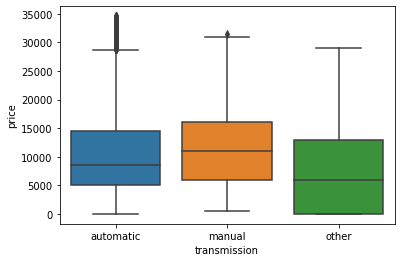

In [103]:
# Plotting a vertical box plot with transmission and price
import seaborn as sb
sb.boxplot( x = 'transmission',y = 'price', data = suv_df)

# display
plt.show()

### Sedan 

In [104]:
# Create table where  type of vehicle is sedan
sedan_df = cars_df_cleaned.query('type == "sedan"')
sedan_df = sedan_df[['price', 'vehicle_age', 'odometer', 'condition_num', 'transmission', 'paint_color']]
sedan_df = sedan_df.reset_index(drop=True)
sedan_df.head()

,price,vehicle_age,odometer,condition_num,transmission,paint_color
0,5500,7.0,5500.0,4,automatic,red
1,14900,3.0,14900.0,0,automatic,black
2,14990,5.0,14990.0,0,automatic,black
3,12990,4.0,12990.0,0,automatic,white
4,8990,8.0,8990.0,0,automatic,grey


                  price  vehicle_age  odometer  condition_num
price          1.000000    -0.617337  1.000000       0.008896
vehicle_age   -0.617337     1.000000 -0.617337       0.024996
odometer       1.000000    -0.617337  1.000000       0.008896
condition_num  0.008896     0.024996  0.008896       1.000000


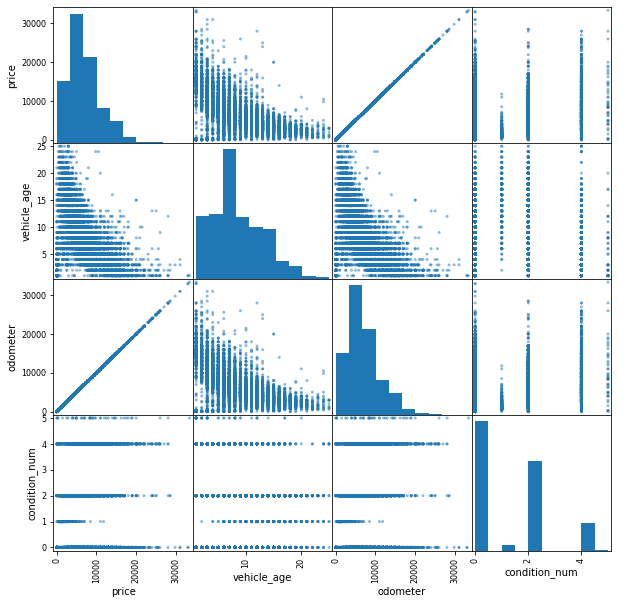

In [105]:
#Plotting using  corralation matrix for sedan vehicle type 
pd.plotting.scatter_matrix(sedan_df, figsize=(10, 10)) 

print(sedan_df.corr())

In [106]:
# Check if any coralation between color of vehicle and price
sedan_df.groupby(['paint_color'])[['price']].median().reset_index().sort_values(by='price',ascending=False)

,paint_color,price
6,orange,8902.0
0,black,6800.0
10,white,6600.0
5,grey,6100.0
8,red,5995.0
1,blue,5900.0
9,silver,5900.0
3,custom,5495.0
7,purple,4997.5
2,brown,4495.0


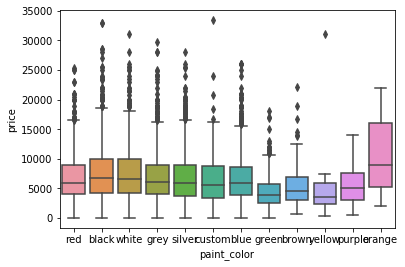

In [107]:
# plotting a vertical box plot with color,transmission and price
import seaborn as sb
sb.boxplot( x = 'paint_color',y = 'price', data = sedan_df)

# display
plt.show()

In [108]:
# Check if any corralation between transmission an price
sedan_df.groupby(['transmission'])[['price']].median().reset_index().sort_values(by='price',ascending=False)

,transmission,price
0,automatic,6000.0
1,manual,4500.0
2,other,3897.5


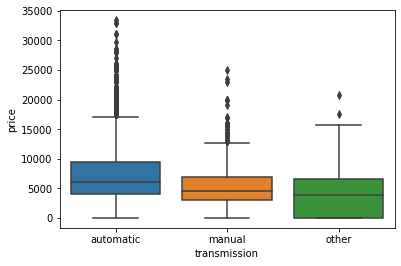

In [109]:
# plotting a vertical box plot with transmission and price
import seaborn as sb
sb.boxplot( x = 'transmission',y = 'price', data = sedan_df)

# display
plt.show()

## General conclusion


 **1.In the data's preparation & exploration stage:**

We observed missing values in columns:
                                     'model_year',
                                     'cylinders',
                                     'odometer',
                                     'paint_color',
                                     'is_4wd' 
The most missing values in column 'is_4wd' and have 50% of misslingness.
Type of missing data is MAP.


 **2.In the data transformation and data-cleaning process stage:**

- We have missing values in column 'cylinders' and 'odometer', bouth was numerical data so it was used impute method by median becouse if we have some outliers in dataset.
- We replaced missing values with Mode in column 'paint_color'
- We treated column 'is_4wd' as Boolean fild and flled in by 0 (True:1 and False:0)
if a Boolean field contains only True values, it's reasonable to assume that the missing values are False.
- We fixed data type in column 'date_posted' by conveting to Timestamp.
- We removed duplicates in our dataset
- We detect outliers in columns 'price','odometer','age_vehicle' and treated using Inter Quantile Range(IQR)and filtered data to make new plots

**3.In analysis stage to answer our questions we got next conclusion:**

- The typical days of listed Ads are 33-39 days
1.  For SUV vehicle type:
- Ther is negative corralation between price and  number 'age_vehicle'and 'odometer',if age of car and miliage is high than price is low.
- There is positive corralation between price and 'paint_color','transmission'.
- The color of car affect  to price. Yellow and orange more expensive 
- There is no corralation between price and condition
2. For sedan vehicle type:
- Ther is negative corralation between number 'age_vehicle'and 'odometer',if age of car and miliage is high than price is low.
- There is positive corralation between price and 'paint_color','transmission'.
- The color of car affect  to price. Yellow and orange more expensive than white , but white color is the most popular color.
- There is no corralation between price and condition 